<a href="https://colab.research.google.com/github/LahiruRuleZz/Binary-Classification-of-Insurance-Cross-Selling/blob/main/Binary_Classification_of_Insurance_Cross_Selling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv', nrows=10000)

In [ ]:
pip install scikit-learn==1.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Male,28,1,13.0,0,< 1 Year,Yes,17666.0,160.0,238,0
9996,9996,Male,24,1,15.0,0,< 1 Year,No,33699.0,152.0,131,0
9997,9997,Male,51,1,28.0,0,1-2 Year,Yes,27330.0,26.0,251,1
9998,9998,Female,22,1,47.0,0,< 1 Year,Yes,35186.0,152.0,275,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,38.324100,0.998700,26.295900,0.463400,30482.400200,112.759900,164.167800,0.115700
std,2886.89568,14.985951,0.036034,13.044714,0.498684,16049.552978,53.822184,80.215857,0.319881
min,0.00000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,2499.75000,24.000000,1.000000,15.000000,0.000000,25374.000000,30.000000,98.000000,0.000000
50%,4999.50000,36.000000,1.000000,28.000000,0.000000,31750.500000,151.000000,166.000000,0.000000
75%,7499.25000,49.000000,1.000000,35.000000,1.000000,39451.250000,152.000000,233.000000,0.000000
max,9999.00000,80.000000,1.000000,51.000000,1.000000,289606.000000,163.000000,299.000000,1.000000


In [ ]:
df.drop(["id"], axis=1, inplace=True)

##Exploratory Data Analysis (EDA)

In [ ]:
df.Response.value_counts()

,count
Response,
0,8843
1,1157


In [ ]:
df['Response'].value_counts()*100/df.shape[0]

,count
Response,
0,88.43
1,11.57


Text(0.5, 1.0, ' Response and Not Response count')

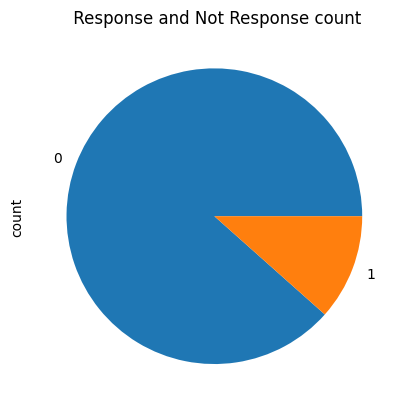

In [ ]:
plt = df.Response.value_counts().plot(kind='pie')
plt.set_title(' Response and Not Response count')

Text(0.5, 1.0, ' Response and Not Response count')

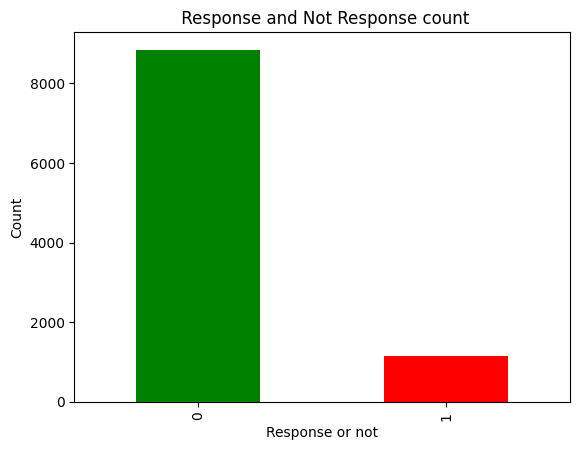

In [ ]:
plt = df.Response.value_counts().plot(kind='bar', color=['green', 'red'])
plt.set_xlabel('Response or not')
plt.set_ylabel('Count')
plt.set_title(' Response and Not Response count')

In [ ]:
response = df[df['Response']==1]
not_response = df[df['Response']==0]

In [ ]:
print(response.shape, not_response.shape)

(1157, 11) (8843, 11)


Text(0.5, 1.0, 'Vehicle Damage count')

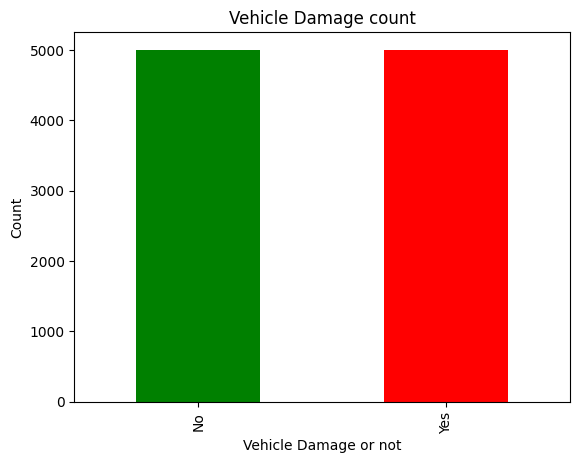

In [ ]:
plt = df.Vehicle_Damage.value_counts().plot(kind='bar', color=['green', 'red'])
plt.set_xlabel('Vehicle Damage or not')
plt.set_ylabel('Count')
plt.set_title('Vehicle Damage count')

Text(0.5, 1.0, 'Vehicle Age Count')

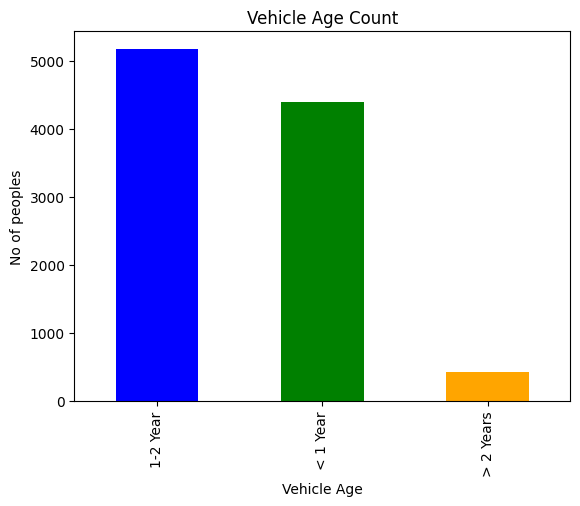

In [ ]:
plt = df.Vehicle_Age.value_counts().plot(kind='bar', color=['blue', 'green', 'orange'])

plt.set_xlabel('Vehicle Age')
plt.set_ylabel('No of peoples')
plt.set_title('Vehicle Age Count')

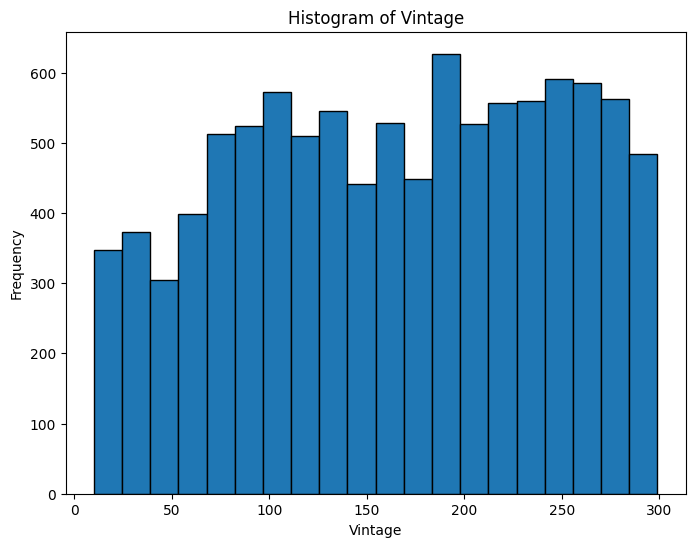

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Vintage'], bins=20, edgecolor='black')
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.title('Histogram of Vintage')
plt.show()


Text(0.5, 1.0, 'Previously Insured count')

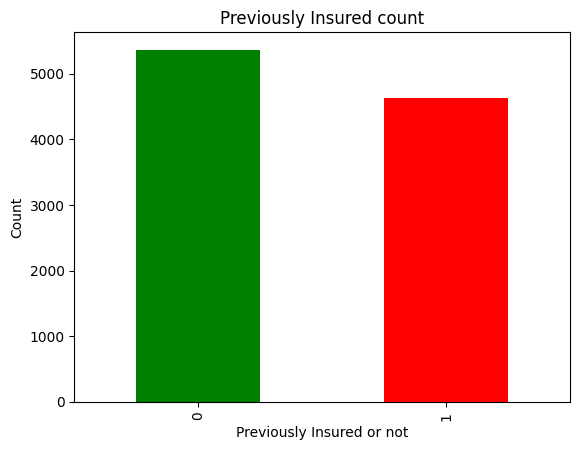

In [ ]:
plt = df.Previously_Insured.value_counts().plot(kind='bar', color=['green', 'red'])
plt.set_xlabel('Previously Insured or not')
plt.set_ylabel('Count')
plt.set_title('Previously Insured count')

In [ ]:
previously_insured = df[df['Previously_Insured']==1]
not_previously_insured = df[df['Previously_Insured']==0]

In [ ]:
print(previously_insured.shape, not_previously_insured.shape)

(4634, 11) (5366, 11)


In [ ]:
max_value = df['Annual_Premium'].max()
min_value = df['Annual_Premium'].min()

print(max_value, min_value)

289606.0 2630.0


According to the DataFrame Response as 1 and Not Response as 0

In [ ]:
# Count of each Vehicle_Age for Response == 0
response_0_count = df[df.Response == 0].Vehicle_Age.value_counts()

# Count of each Vehicle_Age for Response == 1
response_1_count = df[df.Response == 1].Vehicle_Age.value_counts()

# Combine the counts into a DataFrame
vehicle_age_counts = pd.DataFrame({
    'Response_0_Count': response_0_count,
    'Response_1_Count': response_1_count
})

print(vehicle_age_counts)


             Response_0_Count  Response_1_Count
Vehicle_Age                                    
1-2 Year                 4297               876
< 1 Year                 4231               163
> 2 Years                 315               118


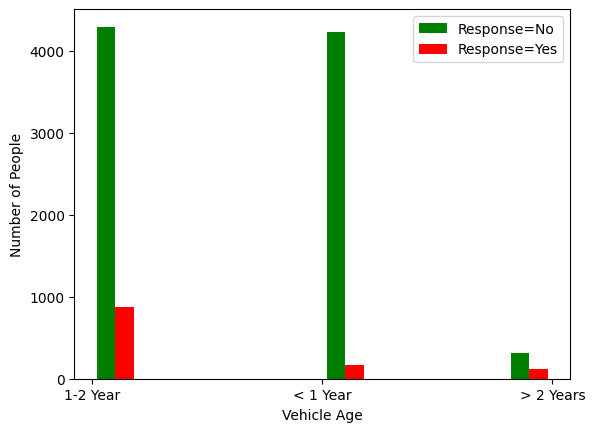

In [ ]:
import matplotlib.pyplot as plt
vehicleage_response_no = df[df.Response==0].Vehicle_Age
vehicleage_response_yes = df[df.Response==1].Vehicle_Age

plt.xlabel("Vehicle Age")
plt.ylabel("Number of People")
plt.title("")


plt.hist([vehicleage_response_no, vehicleage_response_yes], color=['green', 'red'],label=['Response=No', 'Response=Yes'])
plt.legend()


<Axes: xlabel='Vehicle_Age', ylabel='count'>

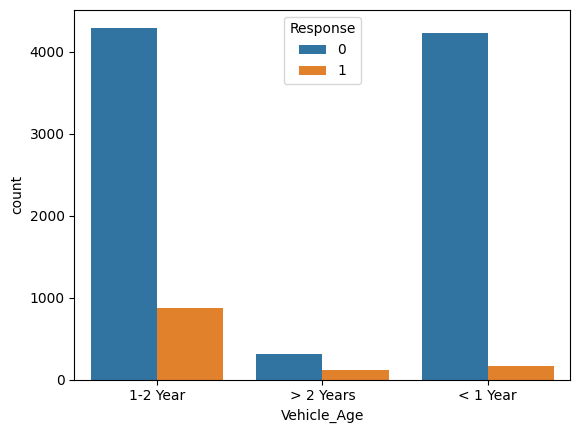

In [ ]:
sns.countplot(hue='Response', x='Vehicle_Age', data=df)

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

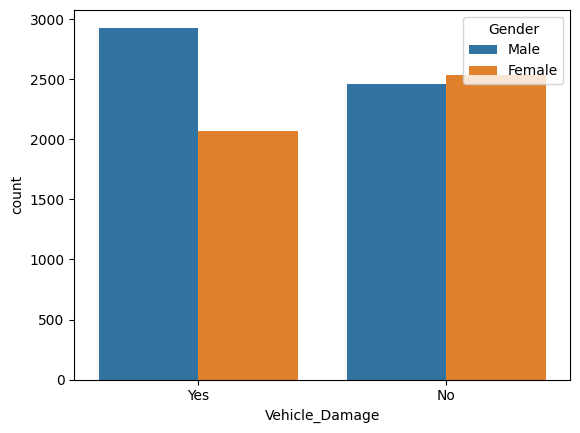

In [ ]:
sns.countplot(hue='Gender', x='Vehicle_Damage', data=df)

<Axes: xlabel='Previously_Insured', ylabel='count'>

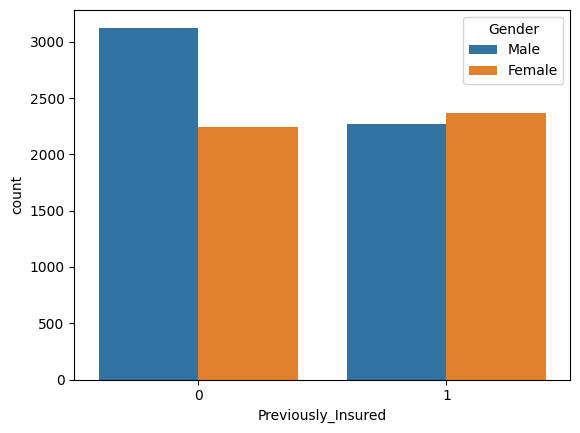

In [ ]:
sns.countplot(hue='Gender', x='Previously_Insured', data=df)

<ipython-input-30-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

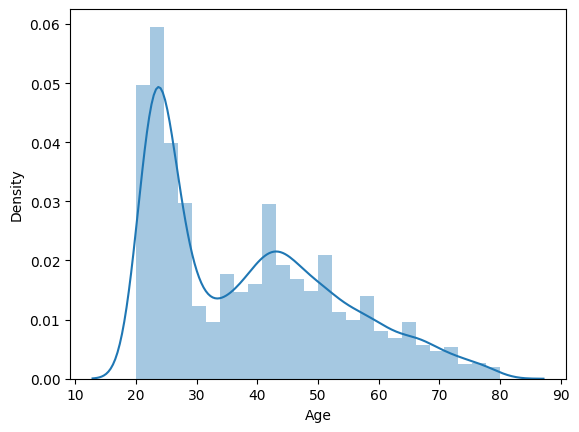

In [ ]:
sns.distplot(df['Age'])

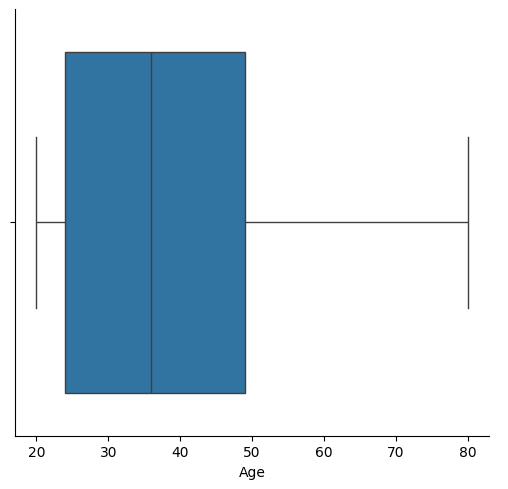

In [ ]:
sns.catplot(x="Age", data=df, kind='box')

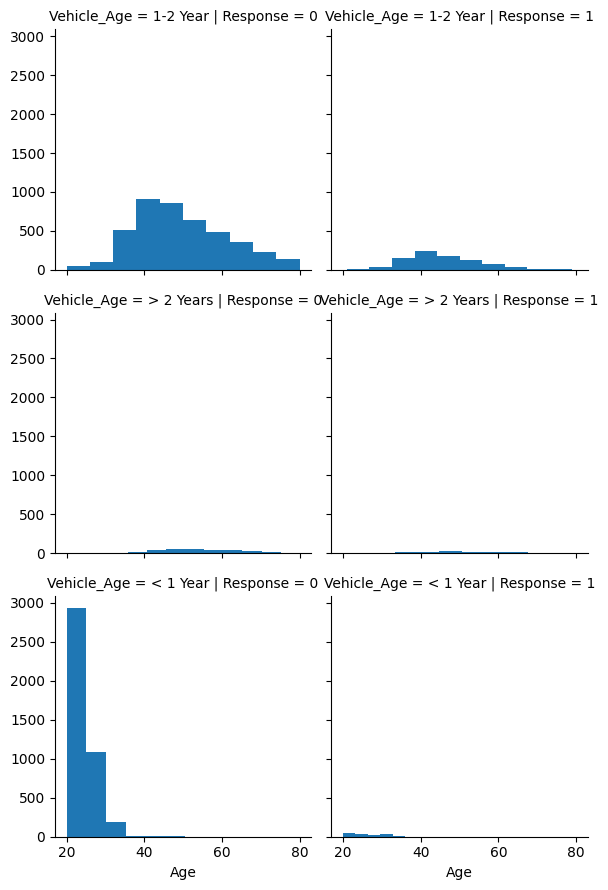

In [ ]:
graph = sns.FacetGrid(df, col='Response', row='Vehicle_Age')
graph.map(plt.hist, 'Age')
graph.add_legend()

In [ ]:
df.dtypes

,0
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64
Vintage,int64


<Axes: >

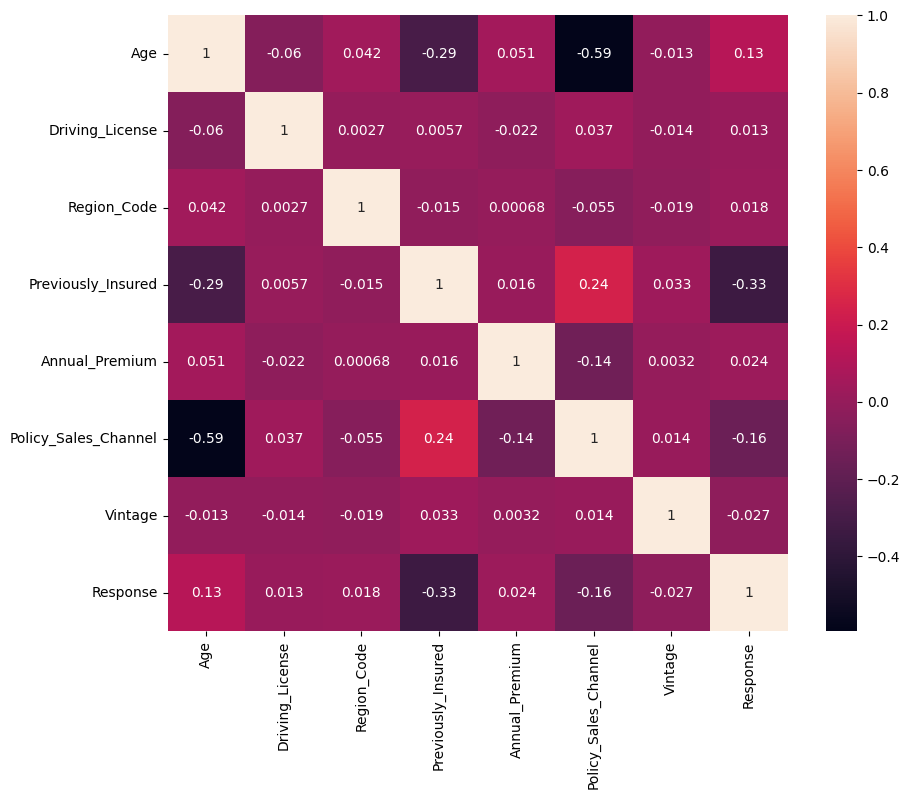

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.drop(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], axis=1).corr(), annot=True)

##Preprocessing

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

Q1, Q3

(24.0, 49.0)

In [ ]:
IQR = Q3-Q1

IQR

25.0

In [ ]:
upper_level = Q3+1.5*IQR
lower_level = Q1-1.5*IQR

upper_level, lower_level

(86.5, -13.5)

In [ ]:
df[(df.Age < lower_level) | (df.Age > upper_level)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [ ]:
age_max = upper_level
age_min = lower_level

def cap_age(age):
    if age > age_max:
        return age_max
    if age < age_min:
        return age_min
    return age
df['Age'] = df['Age'].apply(lambda age: cap_age(age))

In [ ]:
for column in df:
  print(f'{column} : {df[column].unique()}')

Gender : ['Male' 'Female']
Age : [21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67 63 46 37 30
 53 32 28 58 48 59 52 39 44 33 41 57 51 45 68 74 29 49 55 61 60 65 54 38
 56 71 62 70 73 64 69 72 78 80 76 75 77]
Driving_License : [1 0]
Region_Code : [35. 28. 14.  1. 15. 47. 45.  8. 11.  3. 10. 12. 37. 50. 30. 46. 29. 16.
 26. 25. 41. 48.  7.  4. 24. 36. 33.  2.  9. 27. 18. 43. 49. 17. 13. 38.
  6. 21. 23.  0. 19.  5. 39. 44. 20. 40. 22. 32. 42. 31. 34. 51.]
Previously_Insured : [0 1]
Vehicle_Age : ['1-2 Year' '> 2 Years' '< 1 Year']
Vehicle_Damage : ['Yes' 'No']
Annual_Premium : [65101. 58911. 38043. ... 17666. 33699. 53810.]
Policy_Sales_Channel : [124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.   3.  10.  55. 108.   7.  29. 163.  13.
 133. 145.  25.  12. 109.  23.  78.   4. 153. 150. 146. 120. 107. 155.
  61.  14.  45.  11.  19.  24.  52. 132. 125.  59.  16.  22.  56.  20.
 148. 158. 159. 139.   9. 113. 121.  21. 111.  64. 

In [ ]:
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print("There are", duplicate_rows, "duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [ ]:

def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Gender : ['Male' 'Female']
Vehicle_Age : ['1-2 Year' '> 2 Years' '< 1 Year']
Vehicle_Damage : ['Yes' 'No']


In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [ ]:
df['Gender'].unique()

array([1, 0])

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
df['Vehicle_Damage'].unique()

array([1, 0])

In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':2, '> 2 Years':3})

In [ ]:
df['Vehicle_Age'].unique()

array([1, 3, 2])

In [ ]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,3,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,2,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,28,1,13.0,0,2,1,17666.0,160.0,238,0
9996,1,24,1,15.0,0,2,0,33699.0,152.0,131,0
9997,1,51,1,28.0,0,1,1,27330.0,26.0,251,1
9998,0,22,1,47.0,0,2,1,35186.0,152.0,275,0


In [ ]:
X = X = df.iloc[:, :-1]
y = df['Response']

#Feature Engineering (Select best features for the model)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [ ]:
 ordered_rank_features = SelectKBest(score_func=chi2, k=10)
 ordered_feature=ordered_rank_features.fit(X,y)

In [ ]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
feature_rank=pd.concat([dfcolumns, df_scores],axis=1)

In [ ]:
feature_rank.columns = ['Feature', 'Score']
feature_rank

,Feature,Score
0,Gender,7.345805
1,Age,947.735810
2,Driving_License,0.002214
3,Region_Code,21.223310
4,Previously_Insured,599.537019
5,Vehicle_Age,28.133285
6,Vehicle_Damage,604.321931
7,Annual_Premium,50526.971758
8,Policy_Sales_Channel,6261.996713
9,Vintage,277.984295


In [ ]:
feature_rank.nlargest(10, 'Score')

,Feature,Score
7,Annual_Premium,50526.971758
8,Policy_Sales_Channel,6261.996713
1,Age,947.735810
6,Vehicle_Damage,604.321931
4,Previously_Insured,599.537019
9,Vintage,277.984295
5,Vehicle_Age,28.133285
3,Region_Code,21.223310
0,Gender,7.345805
2,Driving_License,0.002214


In [ ]:
df.dtypes

,0
Gender,int64
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,int64
Vehicle_Damage,int64
Annual_Premium,float64
Policy_Sales_Channel,float64
Vintage,int64


In [ ]:
df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,3,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,2,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


#Feature Scaling

In [ ]:
x = df.drop(['Response'], axis=1)
y = df['Response']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

sclr_features = ["Age", "Region_Code", "Annual_Premium"]

df_scaled = pd.DataFrame(data = x)
df_scaled[sclr_features] = scaler.fit_transform(x[sclr_features])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                 test_size=0.2,
                                                 random_state=111222)

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

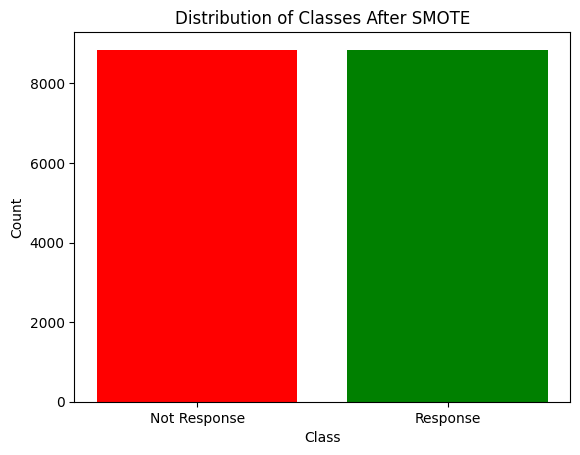

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['Not Response', 'Response'], pd.Series(y_res).value_counts(), color=['red', 'green'])
plt.title('Distribution of Classes After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
clf_GNB.fit(x_res, y_res)

pred_GNB = clf_GNB.predict(x_test)
print("GaussianNB:")
print("Accuracy:", accuracy_score(y_test, pred_GNB))
print("Precision:", precision_score(y_test, pred_GNB))
print("Recall:", recall_score(y_test, pred_GNB))
print("F1 Score:", f1_score(y_test, pred_GNB))
print("Average Precision Score:", average_precision_score(y_test, pred_GNB))
print()

GaussianNB:
Accuracy: 0.715
Precision: 0.2593103448275862
Recall: 0.8506787330316742
F1 Score: 0.3974630021141649
Average Precision Score: 0.2370897955999376



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 200, random_state=200)
clf_RF.fit(x_res, y_res)

pred_RF = clf_RF.predict(x_test)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, pred_RF))
print("Precision:", precision_score(y_test, pred_RF))
print("Recall:", recall_score(y_test, pred_RF))
print("F1 Score:", f1_score(y_test, pred_RF))
print("Average Precision Score:", average_precision_score(y_test, pred_RF))
print()

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Average Precision Score: 1.0



In [ ]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression()
clf_LR.fit(x_train, y_train)
pred = clf_LR.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred_LR = clf_LR.predict(x_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, pred_LR))
print("Precision:", precision_score(y_test, pred_LR))
print("Recall:", recall_score(y_test, pred_LR))
print("F1 Score:", f1_score(y_test, pred_LR))
print("Average Precision Score:", average_precision_score(y_test, pred_LR))
print()

Logistic Regression:
Accuracy: 0.8895
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Average Precision Score: 0.1105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from xgboost import XGBClassifier
clf_XGB  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf_XGB.fit(x_train, y_train)
pred = clf_XGB.predict(x_test)

In [ ]:
pred_XGB = clf_XGB.predict(x_test)
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, pred_XGB))
print("Precision:", precision_score(y_test, pred_XGB))
print("Recall:", recall_score(y_test, pred_XGB))
print("F1 Score:", f1_score(y_test, pred_XGB))
print("Average Precision Score:", average_precision_score(y_test, pred_XGB))
print()

XGBoost:
Accuracy: 0.8735
Precision: 0.3787878787878788
Recall: 0.22624434389140272
F1 Score: 0.28328611898017
Average Precision Score: 0.17119861511037981



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_roc_curve(model, x_test, y_test, model_name):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

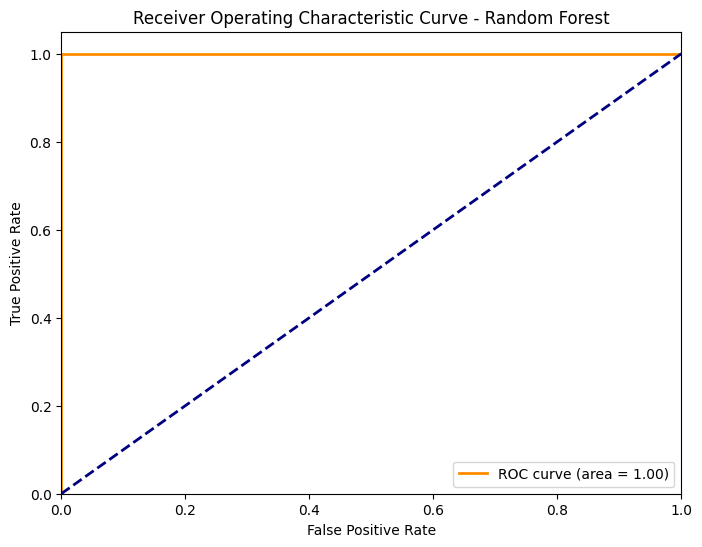

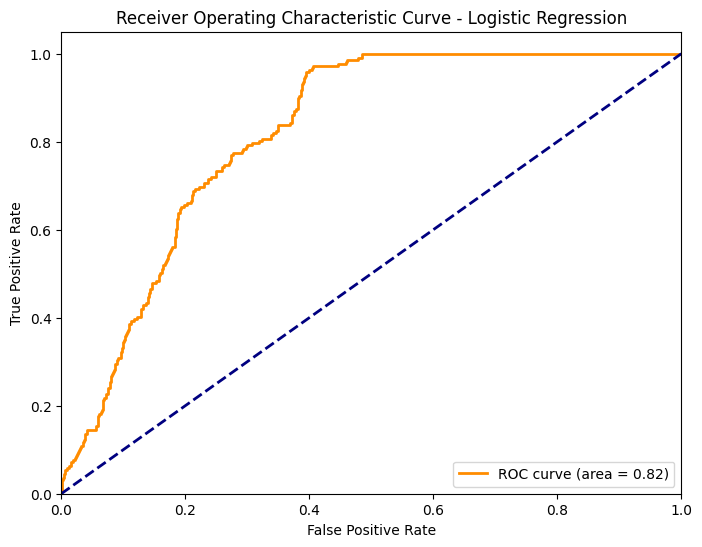

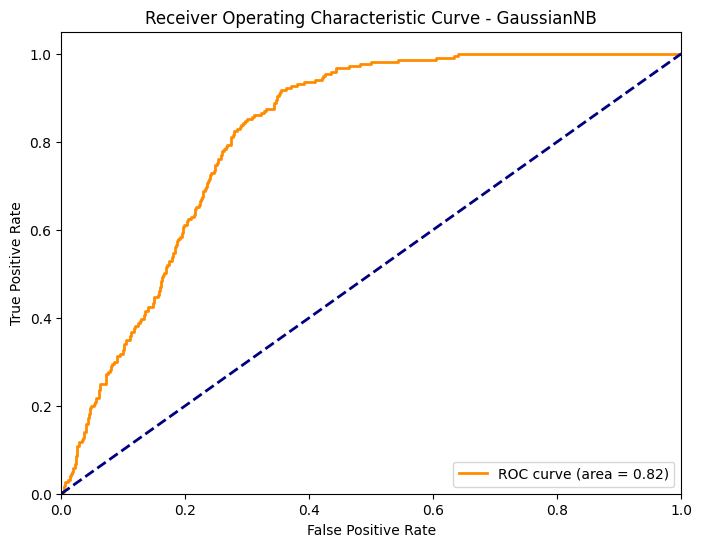

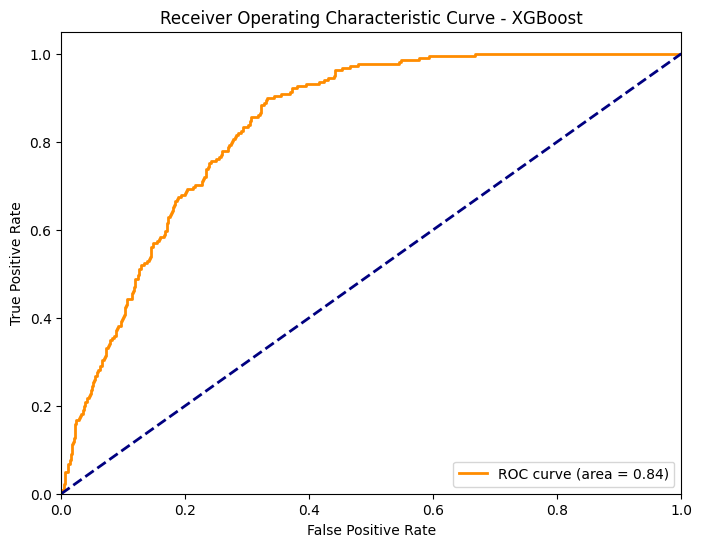

In [ ]:
models = [clf_RF, clf_LR, clf_GNB, clf_XGB]
model_names = ['Random Forest', 'Logistic Regression', 'GaussianNB', 'XGBoost']

for model, name in zip(models, model_names):
    plot_roc_curve(model, x_test, y_test, name)

In [ ]:
from sklearn.model_selection import cross_val_score


classifiers = [clf_RF, clf_LR, clf_GNB, clf_XGB]

results = []

for clf in classifiers:
    cv_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

    results.append(cv_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
for i, clf in enumerate(classifiers):
    print(f"Model: {clf.__class__.__name__}")
    print(f"Mean Accuracy: {results[i].mean():.4f}")
    print(f"Standard Deviation of Accuracy: {results[i].std():.4f}")
    print()

Model: RandomForestClassifier
Mean Accuracy: 0.8711
Standard Deviation of Accuracy: 0.0055

Model: LogisticRegression
Mean Accuracy: 0.8804
Standard Deviation of Accuracy: 0.0021

Model: GaussianNB
Mean Accuracy: 0.8294
Standard Deviation of Accuracy: 0.0102

Model: XGBClassifier
Mean Accuracy: 0.8535
Standard Deviation of Accuracy: 0.0067



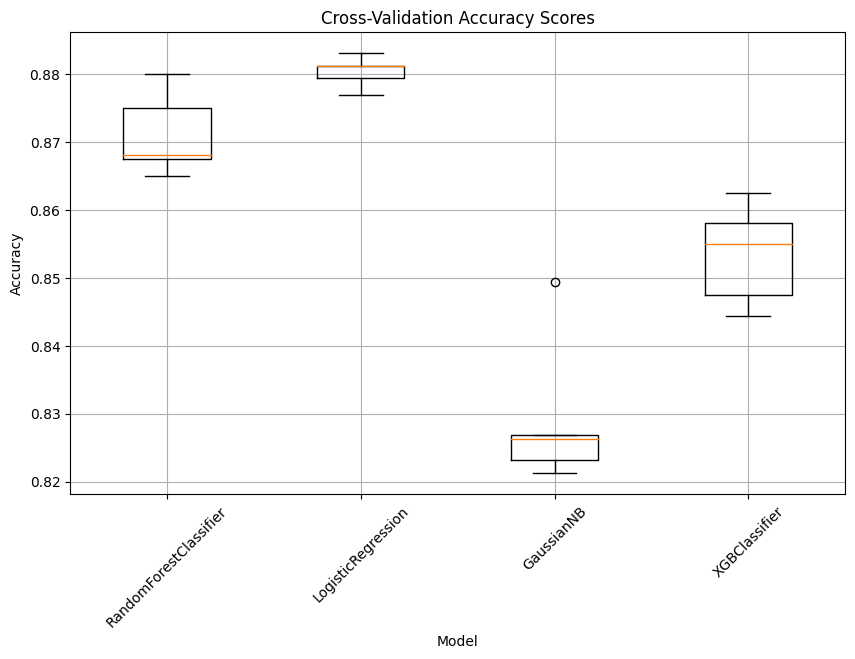

In [ ]:
import matplotlib.pyplot as plt

# Create a list of model names for labeling
model_names = [clf.__class__.__name__ for clf in classifiers]

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=model_names)
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Save the model to Google Drive
import pickle

save_path = '/content/drive/My Drive/model_clf_RF_Insuarance.pkl'
with open(save_path, 'wb') as file:
    pickle.dump(clf_RF, file)

# 3. Load the model from Google Drive
with open(save_path, 'rb') as file:
    model_loaded = pickle.load(file)

# Use the loaded model
predictions = model_loaded.predict(x_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

In [ ]:
pickle.dump(clf_RF, open('model_clf_RF.pkl', 'wb'))

In [ ]:
model_loaded = pickle.load(open('model_clf_RF.pkl', 'rb'))

In [ ]:
model_loaded

RandomForestClassifier(n_estimators=200, random_state=200)

In [ ]:
model_loaded.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
predictions = model_loaded.predict(x_test)

# Add predictions to the test dataframe
x_test_with_preds = x_test.copy()
x_test_with_preds['Prediction'] = predictions

# Separate predictions
pred_1_df = x_test_with_preds[x_test_with_preds['Prediction'] == 1]
pred_0_df = x_test_with_preds[x_test_with_preds['Prediction'] == 0]

# Display or save results
print("Predictions of 1:")
print(pred_1_df)

print("Predictions of 0:")
print(pred_0_df)

Predictions of 1:
      Gender  Age  Driving_License  Region_Code  Previously_Insured  \
7457       1   41                1         39.0                   0   
7371       1   59                1         28.0                   0   
6723       1   35                1          8.0                   0   
2434       1   44                1         15.0                   0   
389        1   47                1         28.0                   0   
...      ...  ...              ...          ...                 ...   
5961       1   50                1         28.0                   0   
186        0   21                1         25.0                   0   
4174       0   45                1         30.0                   0   
1400       1   35                1         39.0                   0   
8771       0   26                1         28.0                   0   

      Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
7457            1               1         44955.0     